In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
from netCDF4 import Dataset


import iris
import iris.plot as iplt
import matplotlib.colors as colors
from sklearn import datasets
import iris.analysis
import numpy.ma as ma

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from esmvaltool.diag_scripts.ipcc_ar5.ch09_fig09_14 import calc_error
from esmvaltool.diag_scripts.ipcc_ar5.ch09_fig09_14 import mask_equatorial


In [3]:
cube_hadisst = iris.load_cube('HadISST_sst.nc', 'sst')
cube_hadisst.units = 'celsius'
print(cube_hadisst)

cube_hadisst_1=cube_hadisst[1308:1560,:,:]  #get the time 1979-1-10 to 1999-12-16
print(cube_hadisst_1)

cube_hadisst_2= cube_hadisst_1.collapsed('time', iris.analysis.MEAN) #take the time-ave

print(cube_hadisst_2.summary(shorten=True))

sea_surface_temperature / (celsius) (time: 1803; latitude: 180; longitude: 360)
     Dimension coordinates:
          time                           x               -               -
          latitude                       -               x               -
          longitude                      -               -               x
     Attributes:
          Conventions: CF-1.0
          Title: Monthly version of HadISST sea surface temperature component
          comment: Data restrictions: for academic research use only. Data are Crown copyright...
          description: HadISST 1.1 monthly average sea surface temperature
          history: 13/5/2020 converted to netcdf from pp format
          institution: Met Office Hadley Centre
          reference: Rayner, N. A., Parker, D. E., Horton, E. B., Folland, C. K., Alexander,...
          source: HadISST
          supplementary_information: Updates and supplementary information will be available from http://ww...
     Cell methods:
     

/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [4]:
def multi_dataset_concatenate (filename):
    '''This concatenate cubes from different datasets into one new cube.
    Filename is a list of multi-dataset(but each dataset must only have one climate variable, eg. ts)'''
    cube_1=iris.load(filename)
    iris.experimental.equalise_cubes.equalise_attributes(cube_1)
    cube_2=cube_1.concatenate_cube()
    return cube_2

In [5]:
cube_ukesm = iris.load_cube('ts_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc', 'ts')
cube_ukesm_1=cube_ukesm[348:600,:,:]  #get the time 1979-1-10 to 1999-12-16, lat &lon 144,192, unit k
cube_ukesm_1.convert_units('celsius')
cube_ukesm_2= cube_ukesm_1.collapsed('time', iris.analysis.MEAN)  #take the time averages first
print(cube_ukesm_2.summary(shorten=True))


cube_hadgem = iris.load_cube('ts_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc', 'ts')
cube_hadgem_1=cube_hadgem[348:600,:,:]  #get the time 1979-1-10 to 1999-12-16  lat &lon 144,192, unit K
cube_hadgem_1.convert_units('celsius')
cube_hadgem_2= cube_hadgem_1.collapsed('time', iris.analysis.MEAN)
print(cube_hadgem_2.summary(shorten=True))


cube_bcccsm = iris.load_cube('ts_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc', 'ts')
cube_bcccsm_1=cube_bcccsm[1548:1800,:,:]  #get the time 1979-1-10 to 1999-12-16  lat &lon 160,320, unit k
cube_bcccsm_1.convert_units('celsius')
cube_bcccsm_2= cube_bcccsm_1.collapsed('time', iris.analysis.MEAN)
print(cube_bcccsm_2.summary(shorten=True))


cube_bccesm = iris.load_cube('ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc', 'ts')
cube_bccesm_1=cube_bccesm[1548:1800,:,:]  #get the time 1979-1-10 to 1999-12-16   lat &lon 64,128, unit k
cube_bccesm_1.convert_units('celsius')
cube_bccesm_2= cube_bccesm_1.collapsed('time', iris.analysis.MEAN)
print(cube_bccesm_2.summary(shorten=True))


cube_cnrm = iris.load_cube('ts_Amon_CNRM-CM6-1_historical_r1i1p1f2_gr_185001-201412.nc', 'ts')
cube_cnrm_1=cube_cnrm[1548:1800,:,:]  #get the time 1979-1-10 to 1999-12-16  lat &lon 128,256, unit k
cube_cnrm_1.convert_units('celsius')
cube_cnrm_2= cube_cnrm_1.collapsed('time', iris.analysis.MEAN)
print(cube_cnrm_2.summary(shorten=True))


cube_access = iris.load_cube('ts_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc', 'ts')
cube_access_1=cube_access[1548:1800,:,:]  #get the time 1979-1-10 to 1999-12-16  lat &lon 145,192, unit k
cube_access_1.convert_units('celsius')
cube_access_2= cube_access_1.collapsed('time', iris.analysis.MEAN)
print(cube_access_2.summary(shorten=True))


cube_miroc = iris.load_cube('ts_Amon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc', 'ts')
cube_miroc_1=cube_miroc[348:600,:,:]  #get the time 1979-1-10 to 1999-12-16    lat &lon 128,256, unit k
cube_miroc_1.convert_units('celsius')
cube_miroc_2= cube_miroc_1.collapsed('time', iris.analysis.MEAN)
print(cube_miroc_2.summary(shorten=True))



cube_mpi1 = 'ts_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_197001-198912.nc'
cube_mpi2 = 'ts_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_199001-200912.nc'
filename=[cube_mpi1,cube_mpi2]
cube_mpi= multi_dataset_concatenate (filename)
cube_mpi_1=cube_mpi[108:360,:,:]    #get the time 1979-1-10 to 1999-12-16    lat &lon 96,192, unit k
cube_mpi_1.convert_units('celsius')
cube_mpi_2= cube_mpi_1.collapsed('time', iris.analysis.MEAN)
print(cube_mpi_2.summary(shorten=True))


cube_fgoalsf = iris.load_cube('ts_Amon_FGOALS-f3-L_historical_r1i1p1f1_gr_185001-201412.nc', 'ts')
cube_fgoalsf_1=cube_fgoalsf[1548:1800,:,:]
cube_fgoalsf_1.convert_units('celsius')
cube_fgoalsf_2= cube_fgoalsf_1.collapsed('time', iris.analysis.MEAN)
print(cube_fgoalsf_2.summary(shorten=True))

cube_fgoalsg1 = 'ts_Amon_FGOALS-g3_historical_r1i1p1f1_gn_197001-197912.nc'
cube_fgoalsg2 = 'ts_Amon_FGOALS-g3_historical_r1i1p1f1_gn_198001-198912.nc'
cube_fgoalsg3 = 'ts_Amon_FGOALS-g3_historical_r1i1p1f1_gn_199001-199912.nc'
filename_1=[cube_fgoalsg1,cube_fgoalsg2,cube_fgoalsg3]
cube_fgoalsg= multi_dataset_concatenate (filename_1)
cube_fgoalsg_1=cube_fgoalsg[108:360,:,:] 
cube_fgoalsg_1.convert_units('celsius')
cube_fgoalsg_2= cube_fgoalsg_1.collapsed('time', iris.analysis.MEAN)
print(cube_fgoalsg_2.summary(shorten=True))


cube_inm = iris.load_cube('ts_Amon_INM-CM4-8_historical_r1i1p1f1_gr1_195001-199912.nc', 'ts')
cube_inm_1=cube_inm[348:600,:,:]
cube_inm_1.convert_units('celsius')
cube_inm_2= cube_inm_1.collapsed('time', iris.analysis.MEAN)
print(cube_inm_2.summary(shorten=True))

cube_ipsl = iris.load_cube('ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc', 'ts')
cube_ipsl_1=cube_ipsl[1548:1800,:,:]
cube_ipsl_1.convert_units('celsius')
cube_ipsl_2= cube_ipsl_1.collapsed('time', iris.analysis.MEAN)
print(cube_ipsl_2.summary(shorten=True))

cube_mri = iris.load_cube('ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc', 'ts')
cube_mri_1=cube_mri[1548:1800,:,:]
cube_mri_1.convert_units('celsius')
cube_mri_2= cube_mri_1.collapsed('time', iris.analysis.MEAN)
print(cube_mri_2.summary(shorten=True))

cube_cesm = iris.load_cube('ts_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc', 'ts')
cube_cesm_1=cube_cesm[1548:1800,:,:]
cube_cesm_1.convert_units('celsius')
cube_cesm_2= cube_cesm_1.collapsed('time', iris.analysis.MEAN)
print(cube_cesm_2.summary(shorten=True))

cube_noresml1 = 'ts_Amon_NorESM2-LM_historical_r1i1p1f1_gn_197001-197912.nc'
cube_noresml2 = 'ts_Amon_NorESM2-LM_historical_r1i1p1f1_gn_198001-198912.nc'
cube_noresml3 = 'ts_Amon_NorESM2-LM_historical_r1i1p1f1_gn_199001-199912.nc'
filename_2=[cube_noresml1,cube_noresml2,cube_noresml3]
cube_noresml= multi_dataset_concatenate (filename_2)
cube_noresml_1=cube_noresml[108:360,:,:] 
cube_noresml_1.convert_units('celsius')
cube_noresml_2= cube_noresml_1.collapsed('time', iris.analysis.MEAN)
print(cube_noresml_2.summary(shorten=True))


cube_noresmm1 = 'ts_Amon_NorESM2-MM_historical_r1i1p1f1_gn_197001-197912.nc'
cube_noresmm2 = 'ts_Amon_NorESM2-MM_historical_r1i1p1f1_gn_198001-198912.nc'
cube_noresmm3 = 'ts_Amon_NorESM2-MM_historical_r1i1p1f1_gn_199001-199912.nc'
filename_3=[cube_noresmm1,cube_noresmm2,cube_noresmm3]
cube_noresmm= multi_dataset_concatenate (filename_3)
cube_noresmm_1=cube_noresmm[108:360,:,:] 
cube_noresmm_1.convert_units('celsius')
cube_noresmm_2= cube_noresmm_1.collapsed('time', iris.analysis.MEAN)
print(cube_noresmm_2.summary(shorten=True))

cube_nesm = iris.load_cube('ts_Amon_NESM3_historical_r1i1p1f1_gn_185001-201412.nc', 'ts')
cube_nesm_1=cube_nesm[1548:1800,:,:]
cube_nesm_1.convert_units('celsius')
cube_nesm_2= cube_nesm_1.collapsed('time', iris.analysis.MEAN)
print(cube_nesm_2.summary(shorten=True))


/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))


surface_temperature / (celsius)     (latitude: 144; longitude: 192)
surface_temperature / (celsius)     (latitude: 144; longitude: 192)
surface_temperature / (celsius)     (latitude: 160; longitude: 320)


/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))


surface_temperature / (celsius)     (latitude: 64; longitude: 128)
surface_temperature / (celsius)     (latitude: 128; longitude: 256)


/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))


surface_temperature / (celsius)     (latitude: 145; longitude: 192)
surface_temperature / (celsius)     (latitude: 128; longitude: 256)
surface_temperature / (celsius)     (latitude: 96; longitude: 192)


/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple

surface_temperature / (celsius)     (latitude: 180; longitude: 288)
surface_temperature / (celsius)     (latitude: 80; longitude: 180)


/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))


surface_temperature / (celsius)     (latitude: 120; longitude: 180)
surface_temperature / (celsius)     (latitude: 143; longitude: 144)
surface_temperature / (celsius)     (latitude: 160; longitude: 320)
surface_temperature / (celsius)     (latitude: 192; longitude: 288)
surface_temperature / (celsius)     (latitude: 96; longitude: 144)


/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/

surface_temperature / (celsius)     (latitude: 192; longitude: 288)
surface_temperature / (celsius)     (latitude: 96; longitude: 192)


/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(message % (variable_name, nc_var_name))


In [6]:
# regrid UKESM1 horizontal grid to 1*1 degree 
sample_points = [('longitude', np.linspace(0.5,359.5,360)),
                 ('latitude',  np.linspace(-89.5,89.5,180))]
cube_ukesm_2 = cube_ukesm_2.interpolate(sample_points, iris.analysis.Linear())


In [7]:
def regridding(model_cube):
    '''regrid models to the changed UKESM1 (180*360) horizontal grid, 
        (regrid: target grid 1*1)(using UKESM1 as areference grid)'''
    model_cube_regridded = model_cube.regrid(cube_ukesm_2, iris.analysis.Linear())
    return model_cube_regridded
    

In [8]:
modelname=['ukesm','hadgem','bcccsm','bccesm','cnrm','access','miroc','mpi',
           'fgoalsf','fgoalsg','inm','ipsl','mri','cesm','noresml','noresmm','nesm','hadisst']

In [9]:
time_ave=[cube_ukesm_2, cube_hadgem_2, cube_bcccsm_2,
          cube_bccesm_2, cube_cnrm_2, cube_access_2,
          cube_miroc_2, cube_mpi_2, cube_fgoalsf_2,
          cube_fgoalsg_2, cube_inm_2, cube_ipsl_2,
          cube_mri_2, cube_cesm_2, cube_noresml_2, 
          cube_noresmm_2, cube_nesm_2, cube_hadisst_2]

In [10]:
for n in range (1,len(modelname)): #UKESM1 doesn't need to be regridded again
    globals()[modelname[n]+'_regrid'] = regridding(time_ave[n])
    #model_regrid={}
    #model_regrid[str(modelname[n]+'_regrid')]=regridding(time_ave[n])
print(globals()[modelname[1]+'_regrid'])  # same as: print(hadgem_regrid)

/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]


surface_temperature / (celsius)     (latitude: 180; longitude: 360)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          time: 1989-07-01 00:00:00, bound=(1979-01-01 00:00:00, 2000-01-01 00:00:00)
     Attributes:
          Conventions: CF-1.7 CMIP-6.2
          activity_id: CMIP
          branch_method: standard
          branch_time_in_child: 0.0
          branch_time_in_parent: 0.0
          cmor_version: 3.4.0
          comment: Temperature of the lower boundary of the atmosphere
          creation_date: 2019-06-19T12:07:39Z
          cv_version: 6.2.20.1
          data_specs_version: 01.00.29
          experiment: all-forcing simulation of the recent past
          experiment_id: historical
          external_variables: areacella
          forcing_index: 3
          frequency: mon
          further_info_url: https://furtherinfo.es-doc.org/CMIP6.MO

In [11]:
print(globals()[modelname[5]+'_regrid'])


surface_temperature / (celsius)     (latitude: 180; longitude: 360)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          time: 1989-07-02 00:00:00, bound=(1979-01-01 00:00:00, 2000-01-01 00:00:00)
     Attributes:
          Conventions: CF-1.7 CMIP-6.2
          activity_id: CMIP
          branch_method: standard
          branch_time_in_child: 0.0
          branch_time_in_parent: 21915.0
          cmor_version: 3.4.0
          comment: Temperature of the lower boundary of the atmosphere
          creation_date: 2019-11-15T03:52:25Z
          data_specs_version: 01.00.30
          experiment: all-forcing simulation of the recent past
          experiment_id: historical
          external_variables: areacella
          forcing_index: 1
          frequency: mon
          further_info_url: https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACCESS-ESM1-5.historica

In [12]:
ukesm_zonal=cube_ukesm_2.collapsed('longitude', iris.analysis.MEAN)

for I in range (1,len(modelname)):
    globals()[modelname[I]+'_zonal'] = globals()[modelname[I]+'_regrid'].collapsed('longitude', iris.analysis.MEAN)


/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [13]:
#ukesm_zonal not stored in the globals() dictionary 
ukesm_zonal_error=calc_error(ukesm_zonal, reference=hadisst_zonal)

for J in range (1,len(modelname)-1):
    globals()[modelname[J]+'_zonal_error'] = calc_error(globals()[modelname[J]+'_zonal'], reference=hadisst_zonal)
print(hadgem_zonal_error.data)


[-- -- -- -- -- -- -- -- -- -- -- -32.45502445432875 -9.507272677951391
 1.367155626085065 51.02918733175327 85.28382290507855 108.03600260416667
 121.84403971354166 142.2630667490787 133.58414195667612
 101.38233469953441 91.85482060770917 81.82465325473137 63.03943406385896
 46.53328107402202 33.209957307304435 25.557266235351562 20.38757086859809
 13.861574215359157 7.12643059624566 3.7665600246853295 1.18843994140625
 0.37431945800781286 0.41774597167968786 0.427337646484375
 0.40837538356295555 0.400989789633301 0.40530032176249176
 0.4341665584645167 0.4219227965448944 0.37551781327461065
 0.3056249136876579 0.22926883890171368 0.1462344871851453
 0.10268500434027672 0.09045890687004032 0.026998620411706753
 -0.023531648482398637 -0.021164873644133664 0.052992825172616165
 0.07573120584889814 -0.0004913477506036656 -0.10547200925709888
 -0.17005989648307818 -0.21310763888888928 -0.25343682554193947
 -0.366682535373954 -0.41133195465686256 -0.4357154639991556
 -0.43823007275558723

In [14]:
conca_data_1=[]
for t in range (30,147):
    conca_data_1.append(ukesm_zonal_error.data[t])

conca_data_2=[]
for j in range (1,len(modelname)-1):
    for k in range(30,147):
        conca_data_2.append(globals()[modelname[j]+'_zonal_error'].data[k])

#convert list to numpy array        
array_da1=np.array(conca_data_1,dtype=float)
array_da2=np.array(conca_data_2,dtype=float)

array_da_a=np.concatenate((array_da1,array_da2))

conca_da_a=array_da_a.reshape(17,117)

avg_a=np.mean(conca_da_a,axis=0) #take the row_averages, preparing for plot in fig (a & c)
#print(avg_a)

std_a = np.std(conca_da_a,axis=0)

x_lat_a=np.linspace(-60.5,56.5,117)

In [15]:
ukesm_equator = cube_ukesm_2[84:96,:] #select the equatorial region (5.5S - 5.5N)

for K in range (1,len(modelname)):
    globals()[modelname[K]+'_equator']=globals()[modelname[K]+'_regrid'] [84:96,:]

In [16]:
ukesm_equator_slice = ukesm_equator.collapsed('latitude', iris.analysis.MEAN)

for L in range (1,len(modelname)):
    globals()[modelname[L]+'_equator_slice']=globals()[modelname[L]+'_equator'].collapsed('latitude', iris.analysis.MEAN)

/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))


In [17]:
def mask_Africa_equatorial(equ):
    """Mask out Africa continent area."""
    lon = equ.coord('longitude').points
    equ.data.mask = equ.data.mask | np.logical_and(lon >= 8.5, lon <= 43.)
    return equ

def mask_South_America_equatorial(equ):
    """Mask out South America continent area."""
    lon = equ.coord('longitude').points
    equ.data.mask = equ.data.mask | np.logical_and(lon >= 279.5, lon <= 311.)
    return equ

In [18]:
def mask_all_equatorial(equ_slice):
    '''Mask out Africa, Indonesia island, south American equatorial area'''
    masked_1=mask_Africa_equatorial(equ_slice)
    masked_2=mask_equatorial(masked_1)
    masked_3=mask_South_America_equatorial(masked_2)
    return masked_3

In [19]:
masked_hadisst=mask_equatorial(hadisst_equator_slice)

masked_ukesm=mask_all_equatorial(ukesm_equator_slice)

for P in range (1,len(modelname)-1):
    globals()['masked_'+ modelname[P]] = mask_all_equatorial(globals()[modelname[P]+'_equator_slice'])


In [20]:
ukesm_equatorial_error=calc_error(masked_ukesm, reference=masked_hadisst)

for T in range (1,len(modelname)-1):
    globals()[modelname[T]+'_equatorial_error'] = calc_error(globals()['masked_'+ modelname[T]], reference=masked_hadisst)


In [21]:
conca_data_3=[]
for t in range (0,360):
    conca_data_3.append(ukesm_equatorial_error.data[t])

conca_data_4=[]
for j in range (1,len(modelname)-1):
    for k in range(0,360):
        conca_data_4.append(globals()[modelname[j]+'_equatorial_error'].data[k])

#convert list to numpy array        
array_da3=np.array(conca_data_3,dtype=float)
array_da4=np.array(conca_data_4,dtype=float)

array_da_b=np.concatenate((array_da3,array_da4))

conca_da_b=array_da_b.reshape(17,360)

avg_b=np.mean(conca_da_b,axis=0) #take the row_averages

std_b = np.std(conca_da_b,axis=0)

x_lon_b=np.linspace(0.5,359.5,360) #set the longitude coordination (x-axis)

/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Warning: converting a masked element to nan.
  # This is added back by InteractiveShellApp.init_path()
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Warning: converting a masked element to nan.
  if sys.path[0] == '':


In [22]:
conca_data_5=[]
for t in range (0,360):
    conca_data_5.append(masked_ukesm.data[t])

conca_data_6=[]
for j in range (1,len(modelname)-1):
    for k in range(0,360):
        conca_data_6.append(globals()['masked_'+ modelname[j]].data[k])

#convert list to numpy array        
array_da5=np.array(conca_data_5,dtype=float)
array_da6=np.array(conca_data_6,dtype=float)

array_da_d=np.concatenate((array_da5,array_da6))

conca_da_d=array_da_d.reshape(17,360)

avg_d=np.mean(conca_da_d,axis=0) #take the row_averages

std_d = np.std(conca_da_d,axis=0)

x_lon_d=np.linspace(0.5,359.5,360) #set the longitude coordination (x-axis)


/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Warning: converting a masked element to nan.
  # This is added back by InteractiveShellApp.init_path()
/Users/apple/anaconda3/envs/esmvaltool/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Warning: converting a masked element to nan.
  if sys.path[0] == '':


In [23]:

line_color=['orangered','orange','yellow','limegreen','deepskyblue','slategrey','darkorchid','hotpink',
            'chocolate','goldenrod','moccasin','khaki','darkgreen','turquoise','teal','violet','pink']

model_name=['UKESM1','HadGEM3-GC31-LL','BCC-CSM2-MR','BCC-ESM1','CNRM-CM6-1','ACCESS-ESM1-5','MIROC6',
            'MPI-ESM1-2-LR','FGOALS-f3-L','FGOALS-g3','INM-CM4-8','IPSL-CM6A-LR','MRI-ESM2-0','CESM2',
            'NorESM2-LM','NorESM2-MM','NESM3']



In [24]:

def all_plot_zonal_mean_error():
    """Plot zonal sst plot (subfigure a)."""
    iplt.plot(ukesm_zonal_error[30:147],color=line_color[0],ls='-',label=model_name[0])
    for m in range(1,len(modelname)-1):
        iplt.plot(globals()[modelname[m]+'_zonal_error'][30:147],color=line_color[m],ls='-',label=model_name[m])
        
        ax1.set(title='(a) Zonal mean SST error',ylabel='SST error (Celsius)',xlabel='Latitude')
        ax1.yaxis.set_minor_locator(MultipleLocator(.5))
        ax1.yaxis.set_major_locator(MultipleLocator(2))
        ax1.xaxis.set_minor_locator(MultipleLocator(10))
        ax1.xaxis.set_major_locator(MultipleLocator(20))
        ax1.xaxis.set_major_formatter(LATITUDE_FORMATTER)
        ax1.tick_params(which='both', direction='in', top=True, right=True, labelsize=10.)
    
def all_plot_zonal_ensemble_mean_a(x_axis_coor, avg, line_style, line_width, line_color): 
    """Plot zonally averaged multi-model mean SST error for subfig(a)."""
    ax1.plot(x_axis_coor, avg, color=line_color, ls=line_style, linewidth=line_width)
    ax1.set_ylim(-6,6.5)
    
    
#-----------------------------------------------------------------------------------------------------------------  
def all_plot_equatorial_sst_error():
    """Plot equatorial sst errors plot (subfigure b)."""
    iplt.plot(ukesm_equatorial_error,color=line_color[0],ls='-')
    for m in range(1,len(modelname)-1):
        iplt.plot(globals()[modelname[m]+'_equatorial_error'],color=line_color[m],ls='-')
        #ax.legend(loc='lower left')
        ax2.set(title='(b) Equatorial SST error',ylabel='SST error (Celsius)',xlabel='Longitude (degrees-East)')
        ax2.set_ylim(-3.5,3.5)
        ax2.yaxis.set_minor_locator(MultipleLocator(.5))
        ax2.yaxis.set_major_locator(MultipleLocator(1))
        ax2.xaxis.set_minor_locator(MultipleLocator(25))
        ax2.xaxis.set_major_locator(MultipleLocator(50))
        ax2.tick_params(which='both', direction='in', top=True, right=True, labelsize=10.)
    
def all_plot_equ_sst_error_ensemble_mean(x_axis_coor, avg, line_style, line_width, line_color): 
    """Plot equatorial multi-model mean SST error"""
    ax2.plot(x_axis_coor, avg, color=line_color, ls=line_style, linewidth=line_width, label='ensemble mean') 
    
    
#-----------------------------------------------------------------------------------------------------------------    
def all_plot_zonal_ensemble_mean(x_axis_coor, avg, line_style, line_width, line_color): 
    """Plot zonally averaged multi-model mean SST error, together with inter-model standard deviation (shading) (subfigure c)."""
    ax3.plot(x_axis_coor, avg, color=line_color, ls=line_style, linewidth=line_width) #label='ensemble mean') 
    ax3.yaxis.set_minor_locator(MultipleLocator(.5))
    ax3.yaxis.set_major_locator(MultipleLocator(2))
    ax3.xaxis.set_minor_locator(MultipleLocator(10))
    ax3.xaxis.set_major_locator(MultipleLocator(20))
    ax3.xaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax3.tick_params(which='both', direction='in', top=True, right=True, labelsize=10.)
    
    
def all_plot_zonal_intermodel_std(x_axis_coor, avg, std , line_color):     
    ax3.fill_between(x_axis_coor, avg - std, avg + std, color=line_color, alpha=0.3) #label='inter-model std')
    ax3.set(title='(c) Zonal mean SST error',ylabel='SST error (Celsius)',xlabel='Latitude')
    ax3.set_ylim(-6,6.5)
    
    
#----------------------------------------------------------------------------------------------------------------
def all_plot_equ_ensemble_mean(x_axis_coor, avg, line_style, line_width, line_color): 
    """Plot equatorial multi-model mean SST, together with inter-model standard deviation (shading) and observations  (subfigure d)."""
    ax4.plot(x_axis_coor, avg, color=line_color, ls=line_style, linewidth=line_width) #label='ensemble mean')
    ax4.set(title='(d) Equatorial SST',ylabel='SST (Celsius)',xlabel='Longitude (degrees-East)')
    ax4.yaxis.set_minor_locator(MultipleLocator(.5))
    ax4.yaxis.set_major_locator(MultipleLocator(1))
    ax4.xaxis.set_minor_locator(MultipleLocator(25))
    ax4.xaxis.set_major_locator(MultipleLocator(50))
    ax4.tick_params(which='both', direction='in', top=True, right=True, labelsize=10.)
    
    
def all_plot_equ_intermodel_std(x_axis_coor, avg, std , line_color):     
    ax4.fill_between(x_axis_coor, avg - std, avg + std, color=line_color, alpha=0.3) #label='inter-model std')
      
    
def all_plot_equatorial_sst(data, line_style, line_width, line_color, model_name):
    """Plot equatorial sst observations."""
    iplt.plot(data, color=line_color, ls=line_style, linewidth=line_width, label=model_name)
  

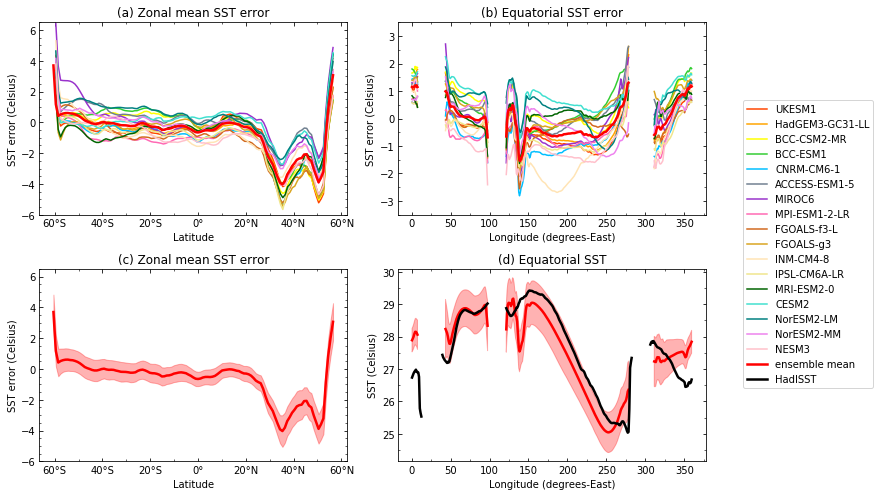

In [25]:

fig=plt.figure(figsize=(10,7)) 

ax1=fig.add_subplot(2,2,1)
all_plot_zonal_mean_error()
all_plot_zonal_ensemble_mean_a(x_lat_a, avg_a, '-', 2.5, 'red')


ax2=fig.add_subplot(2,2,2)
all_plot_equatorial_sst_error()
all_plot_equ_sst_error_ensemble_mean(x_lon_b, avg_b, '-', 2.5, 'red')


ax3=fig.add_subplot(2,2,3)
all_plot_zonal_ensemble_mean(x_lat_a, avg_a, '-', 2.5, 'red')
all_plot_zonal_intermodel_std(x_lat_a, avg_a, std_a , 'red')


ax4=fig.add_subplot(2,2,4)
all_plot_equ_ensemble_mean(x_lon_d, avg_d, '-', 2.5, 'red')
all_plot_equ_intermodel_std(x_lon_d, avg_d, std_d , 'red')
all_plot_equatorial_sst(masked_hadisst, '-', 2.5, 'black', 'HadISST')



lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]


fig.legend(lines, labels, loc=7,bbox_to_anchor=(1.22, 0.5),fontsize=10)


fig.tight_layout()

